# Reporte de práctica 12: Análisis de texto con nltk y wordcloud



In [10]:
import pandas as pd
df2015 = pd.read_excel('2015.xlsx', index_col=None, header=0, sheet_name=0)
df2016 = pd.read_excel('2016.xlsx', index_col=0, header=0, sheet_name=[0,1,2,3,4])
df2017 = pd.read_excel('2017.xlsx', index_col=0, header=0, sheet_name=[0,1,2,3,4])
df2018 = pd.read_excel('2018.xlsx', index_col=None, header=0, sheet_name=0)
df2018mx = pd.read_excel('2018mx.xlsx', index_col=None, header=0, sheet_name=0)

df2015.to_csv("2015.csv", index=False,encoding='utf-8')
df2016[0].to_csv("2016-0.csv", index=False,encoding='utf-8')
df2016[1].to_csv("2016-1.csv", index=False,encoding='utf-8')
df2016[2].to_csv("2016-2.csv", index=False,encoding='utf-8')
df2016[3].to_csv("2016-3.csv", index=False,encoding='utf-8')
df2016[4].to_csv("2016-4.csv", index=False,encoding='utf-8')
df2017[0].to_csv("2017-0.csv", index=False,encoding='utf-8')
df2017[1].to_csv("2017-1.csv", index=False,encoding='utf-8')
df2017[2].to_csv("2017-2.csv", index=False,encoding='utf-8')
df2017[3].to_csv("2017-3.csv", index=False,encoding='utf-8')
df2017[4].to_csv("2017-4.csv", index=False,encoding='utf-8')
df2018.to_csv("2018.csv", index=False,encoding='utf-8')
df2018mx.to_csv("2018mx.csv", index=False,encoding='utf-8')

df2015 = df2015[['corto_sinopsis']]
df2016[0] = df2016[0][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2016[1] = df2016[1][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2016[2] = df2016[2][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2016[3] = df2016[3][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2016[4] = df2016[4][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2017[0] = df2017[0][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2017[1] = df2017[1][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2017[2] = df2017[2][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2017[3] = df2017[3][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2017[4] = df2017[4][['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2018 = df2018[['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]
df2018mx = df2018mx[['Año','Categoría','País','Género','Como se enteró','Referencia Celular']]

KeyError: u"None of [Index([u'corto_sinopsis'], dtype='object')] are in the [columns]"

In [1]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("spanish")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))


[u'de', u'la', u'que', u'el', u'en', u'y', u'a', u'los', u'del', u'se']
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


[nltk_data] Downloading package punkt to
[nltk_data]     /home/samataroukami/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samataroukami/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/samataroukami/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


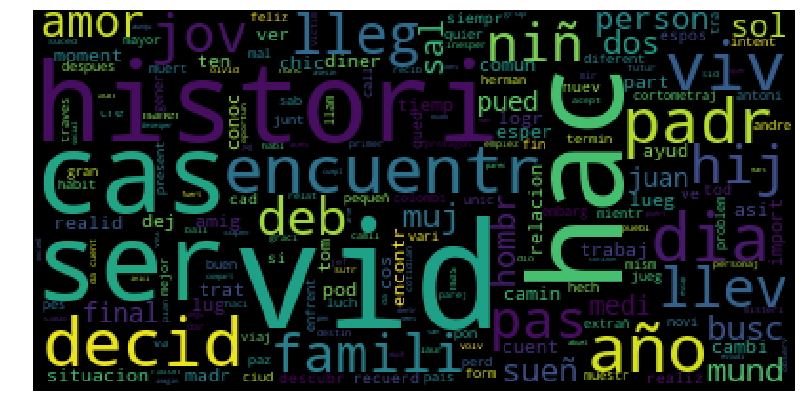

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

d = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2018.xlsx', index_col=None, header=0, sheet_name=0)
d = d[['Categoria','Edad','Pais', 'Titulo','Genero', 'Duracion', 'Marca','Referencia','Dias','Marcas','Personas','Sinopsis']]
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.Sinopsis[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

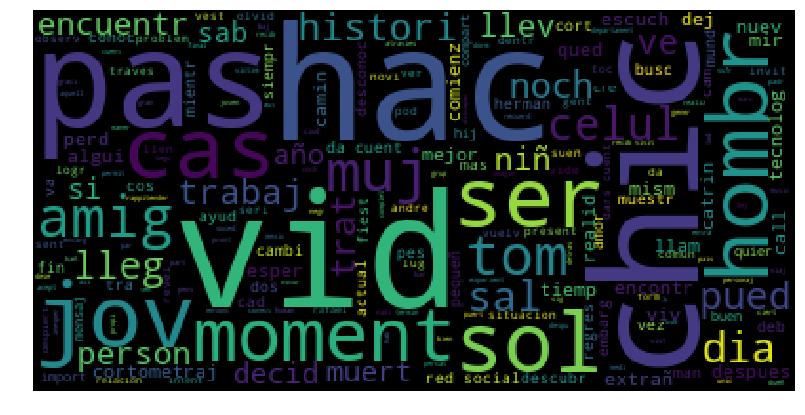

In [13]:
d = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2018mx.xlsx', index_col=None, header=0, sheet_name=0)
d = d[['corto_sinopsis']]
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.corto_sinopsis[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

In [28]:
d = pd.read_excel('https://raw.githubusercontent.com/SamatarouKami/CIENCIA_DE_DATOS/master/2016.xlsx', index_col=None, header=0, sheet_name=0)
d = d[['Sinópsis']]
n = len(d)
spa = stopwords.words("spanish")
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = d.Sinopsis[r]
    reemplazo = ''
    if original != 'SIN_DESCR':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
d['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

/home/samataroukami/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:2754: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._ndarray_values)


KeyError: u"None of [Index([u'Sin\xf3psis'], dtype='object')] are in the [columns]"